# Library

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
import re 
import string 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import spacy
from spacy.lang.id import Indonesian
from spacy.lang.id.stop_words import STOP_WORDS
from string import punctuation

pd.set_option('display.max_colwidth', None)

# Membaca Data

In [2]:
# load data
data_raw1 = pd.read_csv('Dataset/asuransi.csv', sep=';')
data_raw2 = pd.read_csv('Dataset/asuransi_allianz.csv', sep=';')
data_raw3 = pd.read_csv('Dataset/asuransi_prudential.csv', sep=';')
#data_raw4 = pd.read_csv('Dataset/asuransi_aia.csv', sep=';')
data_raw5 = pd.read_csv('Dataset/asuransi_manulife.csv', sep=';')
#data_raw6 = pd.read_csv('Dataset/asuransi_cigna.csv', sep=';')
#data_raw7 = pd.read_csv('Dataset/asuransi_bni.csv', sep=';')
data_raw8 = pd.read_csv('Dataset/asuransi_swasta.csv', sep=';')
data_raw9 = pd.read_csv('Dataset/asuransi_saran.csv', sep=';')
data_raw10 = pd.read_csv('Dataset/asuransi_sinarmas.csv', sep=';')

## Menggabungkan Data

In [3]:
# concat data
data_raw = pd.concat([data_raw1, data_raw2, data_raw3, data_raw5, data_raw8, data_raw9, data_raw10], axis=0)
data_raw = data_raw.reset_index(drop=True)
data_raw.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sun Sep 24 03:59:53 +0000 2023,1705794155526676702,@morninghae_ Gue kasian kuping dia juga mbak2 translator itu harus punya asuransi kesehatan telinga kalo jadi translator SUJU dan asuransi kesehatan jiwa hahahahahahah Emang kudu satu2 ya translator mereka 😅😅😅,0,0,0,0,in,79126299,1705784589426528300,heidy_alkaff,https://twitter.com/heidy_alkaff/status/1705794155526676702
1,Sun Sep 24 03:53:01 +0000 2023,1705792427209240785,"@worksfess Kerjaan enak, deket suami &amp keluarga, gaji di atas umr setempat, ada asuransi kesehatan dr kantor, atasan baek dan selow Kalo rekan kerja? ngga terlalu mikirin sih, niat kerja cari uang, yg lain2 abaikan",0,0,0,0,in,1305656900436897792,1705764902638637526,kucingtertidur,https://twitter.com/kucingtertidur/status/1705792427209240785
2,Sun Sep 24 03:32:30 +0000 2023,1705787263639322979,@m00nwarrior Yang penting dapat umr plus bonus dan asuransi kesehatan,0,1,0,0,in,271273146,1705588574064988328,Bukan_sp_sp,https://twitter.com/Bukan_sp_sp/status/1705787263639322979
3,Sun Sep 24 01:30:32 +0000 2023,1705756571756908790,@Safa_Andriana Bacakan tanda bintang (*) Syarat dan ketentuan berlaku Spt 1.Wajib pnya asuransi kesehatan dan jiwa serta warisan trsembunyi dr istri dan anak sah sbesar x milyar. 2.Kondisi kesehatan kanker stadium 4 atau jantung 2 ring 😎😎,0,0,0,0,in,147534865,1705584263364776423,TwiteX2010,https://twitter.com/TwiteX2010/status/1705756571756908790
4,Sat Sep 23 17:39:04 +0000 2023,1705637921087434847,"@worksfess Buatin akun dana pensiun buat orang tua aja nder kalo ortumu gamau dikasih, atau bisa juga beliin asuransi kesehatan kalo belum punya, atau buka rekening untuk liburan keluarga. Ngasih orang tua itu ga harus, tapi kalo mau ngebahagiain orang tua juga baik🫶",0,0,0,0,in,2259784158,1705499230276862366,PupuJuniar,https://twitter.com/PupuJuniar/status/1705637921087434847


## Clone Data

In [32]:
df = data_raw.copy()

In [33]:
# sum duplicate data
df.duplicated().sum()

127

## menghapus nilai teks yang duplikat

In [34]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sun Sep 24 03:59:53 +0000 2023,1705794155526676702,@morninghae_ Gue kasian kuping dia juga mbak2 translator itu harus punya asuransi kesehatan telinga kalo jadi translator SUJU dan asuransi kesehatan jiwa hahahahahahah Emang kudu satu2 ya translator mereka 😅😅😅,0,0,0,0,in,79126299,1705784589426528300,heidy_alkaff,https://twitter.com/heidy_alkaff/status/1705794155526676702
1,Sun Sep 24 03:53:01 +0000 2023,1705792427209240785,"@worksfess Kerjaan enak, deket suami &amp keluarga, gaji di atas umr setempat, ada asuransi kesehatan dr kantor, atasan baek dan selow Kalo rekan kerja? ngga terlalu mikirin sih, niat kerja cari uang, yg lain2 abaikan",0,0,0,0,in,1305656900436897792,1705764902638637526,kucingtertidur,https://twitter.com/kucingtertidur/status/1705792427209240785
2,Sun Sep 24 03:32:30 +0000 2023,1705787263639322979,@m00nwarrior Yang penting dapat umr plus bonus dan asuransi kesehatan,0,1,0,0,in,271273146,1705588574064988328,Bukan_sp_sp,https://twitter.com/Bukan_sp_sp/status/1705787263639322979
3,Sun Sep 24 01:30:32 +0000 2023,1705756571756908790,@Safa_Andriana Bacakan tanda bintang (*) Syarat dan ketentuan berlaku Spt 1.Wajib pnya asuransi kesehatan dan jiwa serta warisan trsembunyi dr istri dan anak sah sbesar x milyar. 2.Kondisi kesehatan kanker stadium 4 atau jantung 2 ring 😎😎,0,0,0,0,in,147534865,1705584263364776423,TwiteX2010,https://twitter.com/TwiteX2010/status/1705756571756908790
4,Sat Sep 23 17:39:04 +0000 2023,1705637921087434847,"@worksfess Buatin akun dana pensiun buat orang tua aja nder kalo ortumu gamau dikasih, atau bisa juga beliin asuransi kesehatan kalo belum punya, atau buka rekening untuk liburan keluarga. Ngasih orang tua itu ga harus, tapi kalo mau ngebahagiain orang tua juga baik🫶",0,0,0,0,in,2259784158,1705499230276862366,PupuJuniar,https://twitter.com/PupuJuniar/status/1705637921087434847


# EDA

In [35]:
print('Jumlah data: ', len(df))

Jumlah data:  4656


In [36]:
print('Info data: ')
print(df.info())

Info data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4656 entries, 0 to 4655
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           4656 non-null   object
 1   id_str               4656 non-null   int64 
 2   full_text            4656 non-null   object
 3   quote_count          4656 non-null   int64 
 4   reply_count          4656 non-null   int64 
 5   retweet_count        4656 non-null   int64 
 6   favorite_count       4656 non-null   int64 
 7   lang                 4656 non-null   object
 8   user_id_str          4656 non-null   int64 
 9   conversation_id_str  4656 non-null   int64 
 10  username             4656 non-null   object
 11  tweet_url            4656 non-null   object
dtypes: int64(7), object(5)
memory usage: 436.6+ KB
None


# Data Processing

## Data Transformation

In [37]:
df['created_at'] = pd.to_datetime(df['created_at'])

C:\Users\farha\AppData\Local\Temp\ipykernel_13536\329245698.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4656 entries, 0 to 4655
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   created_at           4656 non-null   datetime64[ns, UTC]
 1   id_str               4656 non-null   int64              
 2   full_text            4656 non-null   object             
 3   quote_count          4656 non-null   int64              
 4   reply_count          4656 non-null   int64              
 5   retweet_count        4656 non-null   int64              
 6   favorite_count       4656 non-null   int64              
 7   lang                 4656 non-null   object             
 8   user_id_str          4656 non-null   int64              
 9   conversation_id_str  4656 non-null   int64              
 10  username             4656 non-null   object             
 11  tweet_url            4656 non-null   object             
dtypes: datetime64[ns, UT

In [39]:
df.head(2)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,2023-09-24 03:59:53+00:00,1705794155526676702,@morninghae_ Gue kasian kuping dia juga mbak2 translator itu harus punya asuransi kesehatan telinga kalo jadi translator SUJU dan asuransi kesehatan jiwa hahahahahahah Emang kudu satu2 ya translator mereka 😅😅😅,0,0,0,0,in,79126299,1705784589426528300,heidy_alkaff,https://twitter.com/heidy_alkaff/status/1705794155526676702
1,2023-09-24 03:53:01+00:00,1705792427209240785,"@worksfess Kerjaan enak, deket suami &amp keluarga, gaji di atas umr setempat, ada asuransi kesehatan dr kantor, atasan baek dan selow Kalo rekan kerja? ngga terlalu mikirin sih, niat kerja cari uang, yg lain2 abaikan",0,0,0,0,in,1305656900436897792,1705764902638637526,kucingtertidur,https://twitter.com/kucingtertidur/status/1705792427209240785


# Text Preprocessing

## Cleaning Text

In [40]:
def remove_words(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text) 
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text) 
    text = re.sub(r'\s+', ' ', text) 
    text = re.sub(r'haha\S+', '', text)
    text = re.sub(r'wkwk\S+', '', text)
    text = re.sub(r'\d+', '', text) 
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'pic\S+', '', text)
    text = re.sub(r'pic.twitter\S+', '', text)
    return text

In [41]:
# menghapus kata di kolom 'text'
df['full_text'] = df['full_text'].apply(remove_words)
df.head(2)           

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,2023-09-24 03:59:53+00:00,1705794155526676702,gue kasian kuping dia juga mbak translator itu harus punya asuransi kesehatan telinga kalo jadi translator suju dan asuransi kesehatan jiwa emang kudu satu ya translator mereka,0,0,0,0,in,79126299,1705784589426528300,heidy_alkaff,https://twitter.com/heidy_alkaff/status/1705794155526676702
1,2023-09-24 03:53:01+00:00,1705792427209240785,kerjaan enak deket suami amp keluarga gaji di atas umr setempat ada asuransi kesehatan dr kantor atasan baek dan selow kalo rekan kerja ngga terlalu mikirin sih niat kerja cari uang yg lain abaikan,0,0,0,0,in,1305656900436897792,1705764902638637526,kucingtertidur,https://twitter.com/kucingtertidur/status/1705792427209240785


In [42]:
# tokenisasi
df['full_text'] = df['full_text'].apply(word_tokenize)

In [43]:
df.head(2)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,2023-09-24 03:59:53+00:00,1705794155526676702,"[gue, kasian, kuping, dia, juga, mbak, translator, itu, harus, punya, asuransi, kesehatan, telinga, kalo, jadi, translator, suju, dan, asuransi, kesehatan, jiwa, emang, kudu, satu, ya, translator, mereka]",0,0,0,0,in,79126299,1705784589426528300,heidy_alkaff,https://twitter.com/heidy_alkaff/status/1705794155526676702
1,2023-09-24 03:53:01+00:00,1705792427209240785,"[kerjaan, enak, deket, suami, amp, keluarga, gaji, di, atas, umr, setempat, ada, asuransi, kesehatan, dr, kantor, atasan, baek, dan, selow, kalo, rekan, kerja, ngga, terlalu, mikirin, sih, niat, kerja, cari, uang, yg, lain, abaikan]",0,0,0,0,in,1305656900436897792,1705764902638637526,kucingtertidur,https://twitter.com/kucingtertidur/status/1705792427209240785


In [44]:
# stopword menggunakan spacy
nlp = Indonesian()
stop_words = STOP_WORDS

# menghapus stopword
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['full_text'] = df['full_text'].apply(remove_stopwords)
df.head(2)

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,2023-09-24 03:59:53+00:00,1705794155526676702,"[gue, kasian, kuping, mbak, translator, asuransi, kesehatan, telinga, kalo, translator, suju, asuransi, kesehatan, jiwa, emang, kudu, ya, translator]",0,0,0,0,in,79126299,1705784589426528300,heidy_alkaff,https://twitter.com/heidy_alkaff/status/1705794155526676702
1,2023-09-24 03:53:01+00:00,1705792427209240785,"[kerjaan, enak, deket, suami, amp, keluarga, gaji, umr, asuransi, kesehatan, dr, kantor, atasan, baek, selow, kalo, rekan, kerja, ngga, mikirin, sih, niat, kerja, cari, uang, yg, abaikan]",0,0,0,0,in,1305656900436897792,1705764902638637526,kucingtertidur,https://twitter.com/kucingtertidur/status/1705792427209240785


# stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
for document in df['full_text']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

df['full_text'] = df['full_text'].apply(lambda x: [stemmed_wrapper(word) for word in x])
df.head(2)

# Wordcloud

In [45]:
text = ' '.join(df['full_text'].sum())

(-0.5, 1599.5, 799.5, -0.5)

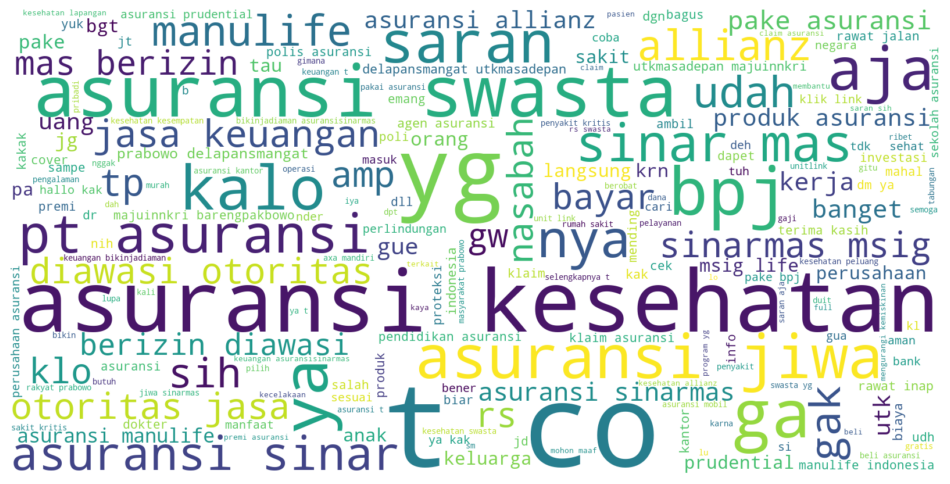

In [46]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [47]:
# lemmatization bahasa indonesia menggunakan library spaCy
import spacy
from spacy.lang.id import Indonesian
from spacy.lang.id.stop_words import STOP_WORDS
from string import punctuation

nlp = Indonesian() 
stopwords = list(STOP_WORDS)
stopwords[:10]

['itulah',
 'sedikitnya',
 'terbanyak',
 'tiba',
 'segala',
 'tanyakan',
 'buat',
 'menanti-nanti',
 'lama',
 'janganlah']

In [48]:
def remove_stopwords(text):
    return [word for word in text if word not in stopwords]

def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(s)
    return output

In [49]:
df['full_text'] = df['full_text'].apply(remove_stopwords)

In [50]:
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,2023-09-24 03:59:53+00:00,1705794155526676702,"[gue, kasian, kuping, mbak, translator, asuransi, kesehatan, telinga, kalo, translator, suju, asuransi, kesehatan, jiwa, emang, kudu, ya, translator]",0,0,0,0,in,79126299,1705784589426528300,heidy_alkaff,https://twitter.com/heidy_alkaff/status/1705794155526676702
1,2023-09-24 03:53:01+00:00,1705792427209240785,"[kerjaan, enak, deket, suami, amp, keluarga, gaji, umr, asuransi, kesehatan, dr, kantor, atasan, baek, selow, kalo, rekan, kerja, ngga, mikirin, sih, niat, kerja, cari, uang, yg, abaikan]",0,0,0,0,in,1305656900436897792,1705764902638637526,kucingtertidur,https://twitter.com/kucingtertidur/status/1705792427209240785
2,2023-09-24 03:32:30+00:00,1705787263639322979,"[umr, plus, bonus, asuransi, kesehatan]",0,1,0,0,in,271273146,1705588574064988328,Bukan_sp_sp,https://twitter.com/Bukan_sp_sp/status/1705787263639322979
3,2023-09-24 01:30:32+00:00,1705756571756908790,"[bacakan, tanda, bintang, syarat, ketentuan, berlaku, spt, wajib, pnya, asuransi, kesehatan, jiwa, warisan, trsembunyi, dr, istri, anak, sah, sbesar, x, milyar, kondisi, kesehatan, kanker, stadium, jantung, ring]",0,0,0,0,in,147534865,1705584263364776423,TwiteX2010,https://twitter.com/TwiteX2010/status/1705756571756908790
4,2023-09-23 17:39:04+00:00,1705637921087434847,"[buatin, akun, dana, pensiun, orang, tua, aja, nder, kalo, ortumu, gamau, dikasih, beliin, asuransi, kesehatan, kalo, buka, rekening, liburan, keluarga, ngasih, orang, tua, ga, kalo, ngebahagiain, orang, tua]",0,0,0,0,in,2259784158,1705499230276862366,PupuJuniar,https://twitter.com/PupuJuniar/status/1705637921087434847


# Word2Vec

In [51]:
from gensim.models import Word2Vec

In [52]:
# word2vec untuk labeling data teks
#model_w2v = Word2Vec( ,size=300, min_count=2, sg=1)

# BERT

In [53]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.nn.functional import softmax

In [54]:
# Fungsi untuk menganalisis sentimen tweet
def analisis_sentimen(tweet, model, tokenizer):
    # Tokenisasi teks tweet
    tokens = tokenizer.encode_plus(tweet, add_special_tokens=True, return_tensors='pt')

    # Prediksi sentimen menggunakan model BERT
    with torch.no_grad():
        outputs = model(**tokens)
        logits = outputs.logits

    # Gunakan softmax untuk mendapatkan probabilitas
    probs = softmax(logits, dim=1)

    # Ambil label dengan probabilitas tertinggi
    predicted_label = torch.argmax(probs, dim=1).item()

    return predicted_label, probs[0][predicted_label].item()


In [55]:
# Load pre-trained model dan tokenizer untuk bahasa Indonesia
model_name = 'indobenchmark/indobert-base-p1'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [56]:
# data yang akan dianalisis pada df yang digunakan
df['sentiment'] = df['full_text'].apply(lambda x: analisis_sentimen(' '.join(x), model, tokenizer)[0])

In [57]:
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,sentiment
0,2023-09-24 03:59:53+00:00,1705794155526676702,"[gue, kasian, kuping, mbak, translator, asuransi, kesehatan, telinga, kalo, translator, suju, asuransi, kesehatan, jiwa, emang, kudu, ya, translator]",0,0,0,0,in,79126299,1705784589426528300,heidy_alkaff,https://twitter.com/heidy_alkaff/status/1705794155526676702,2
1,2023-09-24 03:53:01+00:00,1705792427209240785,"[kerjaan, enak, deket, suami, amp, keluarga, gaji, umr, asuransi, kesehatan, dr, kantor, atasan, baek, selow, kalo, rekan, kerja, ngga, mikirin, sih, niat, kerja, cari, uang, yg, abaikan]",0,0,0,0,in,1305656900436897792,1705764902638637526,kucingtertidur,https://twitter.com/kucingtertidur/status/1705792427209240785,2
2,2023-09-24 03:32:30+00:00,1705787263639322979,"[umr, plus, bonus, asuransi, kesehatan]",0,1,0,0,in,271273146,1705588574064988328,Bukan_sp_sp,https://twitter.com/Bukan_sp_sp/status/1705787263639322979,3
3,2023-09-24 01:30:32+00:00,1705756571756908790,"[bacakan, tanda, bintang, syarat, ketentuan, berlaku, spt, wajib, pnya, asuransi, kesehatan, jiwa, warisan, trsembunyi, dr, istri, anak, sah, sbesar, x, milyar, kondisi, kesehatan, kanker, stadium, jantung, ring]",0,0,0,0,in,147534865,1705584263364776423,TwiteX2010,https://twitter.com/TwiteX2010/status/1705756571756908790,2
4,2023-09-23 17:39:04+00:00,1705637921087434847,"[buatin, akun, dana, pensiun, orang, tua, aja, nder, kalo, ortumu, gamau, dikasih, beliin, asuransi, kesehatan, kalo, buka, rekening, liburan, keluarga, ngasih, orang, tua, ga, kalo, ngebahagiain, orang, tua]",0,0,0,0,in,2259784158,1705499230276862366,PupuJuniar,https://twitter.com/PupuJuniar/status/1705637921087434847,2


In [71]:
# evaluasi model
from sklearn.metrics import classification_report

print(classification_report(df['sentiment'], df['sentiment']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00       244
           2       1.00      1.00      1.00      2610
           3       1.00      1.00      1.00      1715
           4       1.00      1.00      1.00        73

    accuracy                           1.00      4656
   macro avg       1.00      1.00      1.00      4656
weighted avg       1.00      1.00      1.00      4656



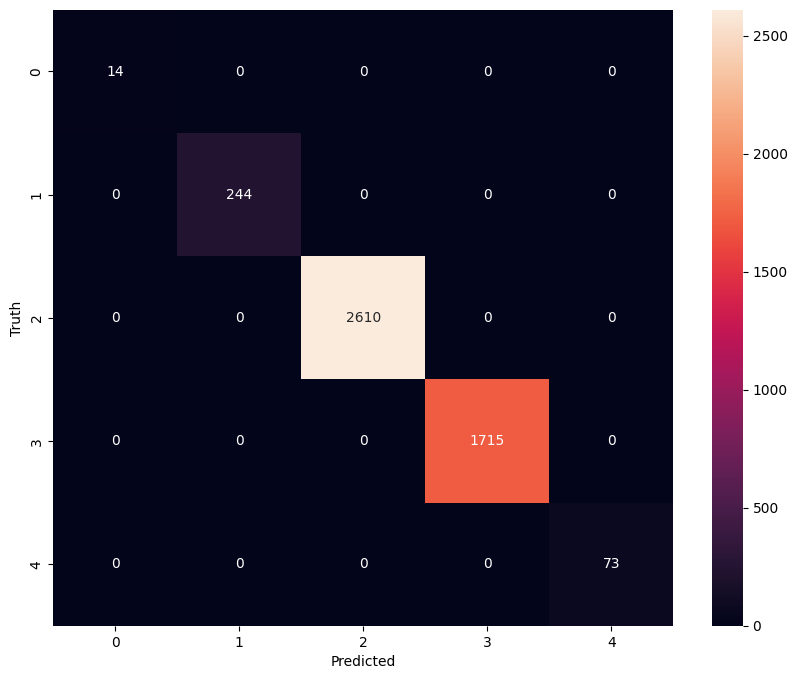

In [72]:
# evaluasi model menggunakan confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(df['sentiment'], df['sentiment'])
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()